# 使用TextRank快速获取一篇文章的摘要

## 简介

[TextRank](http://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf)是受到Google的[PageRank](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf)的启发，通过把文本分割成若干组成单元(单词、句子)并建立图模型, 利用投票机制对文本中的重要成分进行排序, 仅利用单篇文档本身的信息即可实现关键词提取、文摘。和 LDA、HMM 等模型不同, TextRank不需要事先对多篇文档进行学习训练, 因其简洁有效而得到广泛应用。
TextRank 一般模型可以表示为一个有向有权图 G =(V, E), 由点集合 V和边集合 E 组成, E 是V ×V的子集。图中任两点 Vi , Vj 之间边的权重为 w<sub>ji</sub> , 对于一个给定的点 Vi, In(Vi) 为 指 向 该 点 的 点 集 合 , Out(Vi) 为点 Vi 指向的点集合。点 Vi 的得分定义如下:

<img src='./image/textrankformula.png' />

其中, d 为阻尼系数, 取值范围为 0 到 1, 代表从图中某一特定点指向其他任意点的概率, 一般取值为 0.85。使用TextRank 算法计算图中各点的得分时, 需要给图中的点指定任意的初值, 并递归计算直到收敛, 即图中任意一点的误差率小于给定的极限值时就可以达到收敛, 一般该极限值取 0.0001。

我们可以通过TextRank算法，对文章做关键词的提取以及自动文摘提取。
更详细的内容参见：[和textrank4ZH代码一模一样的算法详细解读](https://www.cnblogs.com/www-caiyin-com/p/9719897.html)

## 相关组件安装

相关组件为textrank4zh，其用于抽取中文文章的关键字以及关键句（作为文摘）
安装方法很简单：
```
pip install textrank4zh
```

## 中文文章摘要提取

以我之前写的一篇文章：[AWS认证备考心得](https://www.jianshu.com/p/98e4bcdaea3b)为例（硬广啊，O(∩_∩)O哈哈~）
<img src='./image/aws.png' />

我们通过非常简单的代码实现TextRank的使用：

In [3]:
from textrank4zh import TextRank4Keyword, TextRank4Sentence
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [8]:
def runtextrank(file):
    f = open(file, mode='r', encoding='utf-8')
    text = f.read()
    f.close()

    tr4w = TextRank4Keyword()
    tr4w.analyze(text=text, lower=True, window=5)
    print('关键词：')
    for item in tr4w.get_keywords(10, word_min_len=1):
        print(item['word'], item['weight'])

    tr4s = TextRank4Sentence()
    tr4s.analyze(text=text, lower=True, source = 'no_stop_words')
    data = pd.DataFrame(data=tr4s.key_sentences)
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w')
    plt.plot(data['weight'], 'ro-', lw=2, ms=5, alpha=0.7, mec='#404040')
    plt.grid(b=True, ls=':', color='#606060')
    plt.xlabel('句子', fontsize=12)
    plt.ylabel('重要度', fontsize=12)
    plt.title('句子的重要度曲线', fontsize=15)
    plt.show()

    key_sentences = tr4s.get_key_sentences(num=10, sentence_min_len=2)
    for sentence in key_sentences:
        print(sentence['weight'], sentence['sentence'])

关键词：
考试 0.027935018564767485
相关 0.019789154134256207
aws 0.016636259077242657
题目 0.01407576775822367
看 0.013558049263992051
备考 0.01328776426934064
知识点 0.010689853883336327
认证 0.010566520363575575
会 0.009300281741320988
应该 0.009139419618958523


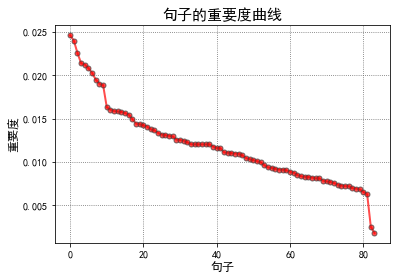

0.024624674608926533 如果这些题目在考试前能够达到90%的准确率，说明基本掌握了备考的知识点了，如果不放心可以在考试前在AWS认证网站花费20美元预考，大概20个题目，65%及格
0.024016249587116383 不过有一些考点在这本书里并没有，或者很少提及，比如：Lambda，ECS，Elastic Beanstalk，CloudFormation，API Gateway，我考试的题目里面，有几题的知识点与它们相关，所以还是应该看一下相关的内容，最起码知道它们是做什么的
0.022585396746875635 根据备考经验，这本书应该是必看的，考试的内容应该大都包含了，内容编排很合理，如每章都有详细的介绍，然后有考试需要注意的重点项目，还有相关内容的仿真题型
0.021385870302766598 总结就是没有捷径，上述的各个内容最好都认真看一遍，如果备考时间是一个月，每天备考时间大概晚上8点到10点，先半个月左右，即30个学时，把官方备考书先看完
0.02124521540684917 值得注意的是，AWS认证考试是连接美国那边服务器的，考试之前最好打电话确认一下当天AWS认证考试的网络情况如何，我去考试那天，网络断了四次，不过每次恢复网络之后，做题进度是联网保存的，考试时间也不会有影响
0.02081627266255728 因为工作需要，今年年初备考AWS Solution Architecture Associate的认证考试
0.02027674881999819 AWS资料中，有很多拓扑图或架构图，先把架构相关的知识点理解，然后再分别学习构成相关架构的各个元素，如学会读懂下图，掌握VPC, AZone, subnet, load balancer, auto scaling
0.01950681834056804 考试不仅考察应试者对AWS相关云服务的熟悉程度，题目也多来源于实际中要解决的问题，要求应试者有全面的架构设计经验和积累，所以含金量很高
0.019032121092932345 3. 考试注册：https://aws.amazon.com/cn/certification/certified-solutions-architect-associate/
0.018858895659387472 选择AWS SA

In [9]:
runtextrank('./txt/aws.txt')

结果还是靠谱的，评判标准？**毕竟我是作者啊**~~~

## 英文文章摘要提取

事实上，这个textrank4zh做英文文章的摘要提取，也非常不错。因为该算法本身应该与语言无关啊，只是textrank4zh的组件包，对中文分词支持非常好而已。
以SEC公开披露的文章为例，
<img src='./image/secsmall.png' />

直观来看，与share merge什么的有关。
我们来看TextRank的结果，代码同上，只是喂的文章是这篇英文文章而已。

关键词：
portfolio 0.02184658057602816
policy 0.01727234660766818
merger 0.017022765571195125
fund 0.01688258532487905
date 0.01650937567134385
reorganization 0.014920320912647621
merging 0.014717803511731473
acquired 0.012681283504756821
prospectus 0.012258546110201685
surviving 0.010469987795383606


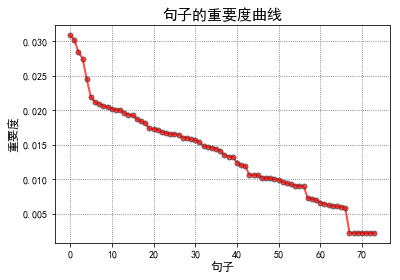

0.030845544238077883 After the Merger Date. Immediately following the Merger Date, the Acquired Portfolio will no longer be available as an investment option under the policies. In addition, for the sixty (60) days following the Merger Date, you may transfer all or a portion of your accumulation unit value out of the Investment Division for the Acquiring Portfolio to another investment option without any charge or limitation (except potentially harmful transfers (see the “Limits on Transfers” section in the Prospectus for your policy)) and without the transfer counting toward the number of free transfers that otherwise may be made in a given Policy Year. Such transfers will be based on the accumulation unit value of the Investment Division for the Acquiring Portfolio as of the close of the Business Day that we receive the transfer request. All other transfers are subject to limitations, and may be subject to charges, as described in the Prospectus for your policy. Please see the Prospe

In [10]:
runtextrank('./txt/secdoc.txt')

看起来内容聚焦在merge上，八九不离十了~~~~

## 较大的英文文章摘要提取
这里的较大，是指超过3500句以上的文档，数万的单词量。

粗略看上去，我也不清楚主要是说什么的。。。
<br>那就直接看结果吧

<img src='./image/secbig.png' />

关键词：
policy 0.015148000545573168
insurance 0.0076696873841799375
investment 0.006696896916816165
life 0.0061127787815478205
amount 0.005691912888323185
benefit 0.005606466435793987
rider 0.005400878053318155
premium 0.004975816146068638
death 0.004657684469154609
portfolio 0.004598998468890753


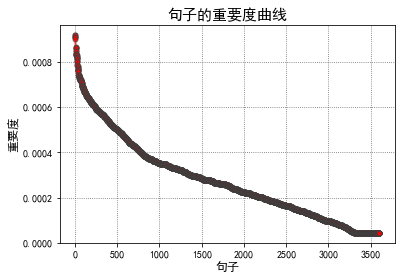

0.0009159391391327122 3 The mortality and expense risk face amount charge rate is based on the Age and Risk Class of the Insured and the Face Amount on the Policy Date. It also varies with the Death Benefit Option you choose. Each Coverage Segment will have a corresponding face amount charge related to the amount of the increase, based on the Age and Risk Class of the Insured at the time of the increase. The charge is level for 10 Policy Years from the effective date of the Coverage Segment, then is reduced in Policy Year 11 and thereafter. The mortality and expense risk face amount charges shown in the table may not be typical of the charges you will pay. Ask your life insurance producer for information regarding this charge for your Policy. The mortality and expense risk face amount charge for your Policy will be stated in the Policy Specifications.
0.0009159391391327117 3 The mortality and expense risk face amount charge rate is based on the Age and Risk Class of the Insured and the

In [12]:
runtextrank('./txt/secdocbig.txt')

看起来有几句是重复的？因为在文章里面这些句子确实重复出现了几次，而且也被TextRank算法认为很重要。是否真的应该权重这么高，还需要业务人员的专业意见。
不过建议对这种几千句的文章，可以输出Top 20或更多的句子，这样更客观一些。

## 小结
大家平时会处理大量的文档，如果可以尝试通过TextRank，获取文章重要的句子，那么快速获取一篇文章的摘要乃至中心思想，是很有帮助的。